In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [3]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_csv['Title'] = train_csv['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
test_csv['Title'] = test_csv['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])

In [5]:
train_csv.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [5]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don.', 'Major.', 'Capt.', 'Jonkheer.', 'Rev.', 'Col.','Sir.']:
        return 'Mr.'
    elif title in ['Countess.', 'Mme.','Lady.','the','Dona.']:
        return 'Mrs.'
    elif title in ['Mlle.', 'Ms.']:
        return 'Miss.'
    elif title =='Dr.':
        if x['Sex']=='Male':
            return 'Mr.'
        else:
            return 'Mrs.'
    else:
        return title
train_csv['Title']=train_csv.apply(replace_titles, axis=1)
test_csv['Title']=test_csv.apply(replace_titles, axis=1)

In [6]:
print(test_csv['Title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.']


In [7]:
train_csv= train_csv.drop(columns=['Name','PassengerId','Ticket','Cabin'])
test_csv= test_csv.drop(columns=['Name','PassengerId','Ticket','Cabin'])

In [8]:
train_csv.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [10]:
age_missing = train_csv['Age'].isna().sum()
Pclass_missing = train_csv['Pclass'].isna().sum()
Fare_missing= train_csv['Fare'].isna().sum()
SibSp_missing = train_csv['SibSp'].isna().sum()
Parch_missing = train_csv['Parch'].isna().sum()
Survived_missing= train_csv['Survived'].isna().sum()

In [11]:
print(age_missing,Pclass_missing,Fare_missing,SibSp_missing,Parch_missing,Survived_missing)

177 0 0 0 0 0


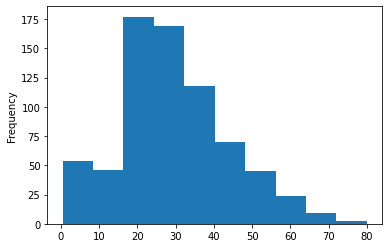

In [12]:
train_csv['Age'].plot(kind='hist')
plt.show()

In [9]:
median = train_csv['Age'].median()
median2 = test_csv['Age'].median()
print(median)

28.0


In [10]:
train_csv['Age'] = train_csv['Age'].fillna(median)
test_csv['Age'] = test_csv['Age'].fillna(median2)

In [15]:
age_missing = train_csv['Age'].isna().sum()
print(age_missing)

0


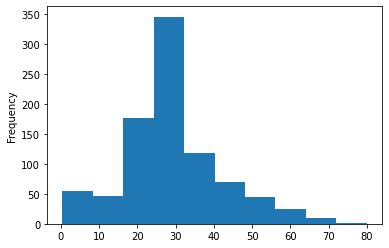

In [16]:
train_csv['Age'].plot(kind='hist')
plt.show()

In [11]:
train_csv.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [17]:
print(train_csv['Embarked'].isna().sum(),train_csv['Sex'].isna().sum())

2 0


In [113]:
train_csv['Embarked'].dropNA()

AttributeError: 'Series' object has no attribute 'dropNA'

In [12]:
train_csv = train_csv.dropna(subset=['Embarked'])
test_csv = test_csv.dropna(subset=['Embarked'])

In [19]:
print(train_csv.count())

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
Title       889
dtype: int64


In [14]:
print(train_csv.head())
print(test_csv.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    male  22.0      1      0   7.2500        S    Mr.
1         1       1  female  38.0      1      0  71.2833        C   Mrs.
2         1       3  female  26.0      0      0   7.9250        S  Miss.
3         1       1  female  35.0      1      0  53.1000        S   Mrs.
4         0       3    male  35.0      0      0   8.0500        S    Mr.
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title
0       3    male  34.5      0      0   7.8292        Q   Mr.
1       3  female  47.0      1      0   7.0000        S  Mrs.
2       2    male  62.0      0      0   9.6875        Q   Mr.
3       3    male  27.0      0      0   8.6625        S   Mr.
4       3  female  22.0      1      1  12.2875        S  Mrs.


In [21]:
age_missing = train_csv['Age'].isna().sum()
Pclass_missing = train_csv['Pclass'].isna().sum()
Fare_missing= train_csv['Fare'].isna().sum()
SibSp_missing = train_csv['SibSp'].isna().sum()
Parch_missing = train_csv['Parch'].isna().sum()
print(age_missing,Pclass_missing,Fare_missing,SibSp_missing,Parch_missing)
test_csv['Fare'] = test_csv['Fare'].fillna(test_csv['Fare'].mean())

0 0 0 0 0


In [22]:
data=pd.concat([train_csv,test_csv],axis=0,ignore_index=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr.
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs.
2,1.0,3,female,26.0,0,0,7.9250,S,Miss.
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs.
4,0.0,3,male,35.0,0,0,8.0500,S,Mr.


In [23]:

le= LabelEncoder()
le.fit(data['Sex'])

# Transform the 'Sex' column and store the result in a new column
data['Sex_label_encoded'] = le.transform(data['Sex'])

In [118]:
train_csv.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_label_encoded
0,0,3,male,22.0,1,0,7.2500,S,Mr.,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,0
2,1,3,female,26.0,0,0,7.9250,S,Miss.,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,0
4,0,3,male,35.0,0,0,8.0500,S,Mr.,1


In [24]:
print(data['Title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.']


In [25]:
le.fit(data['Embarked'])

LabelEncoder()

In [26]:
# Transform the 'Embarked' column and store the result in a new column
data['Embarked_label_encoded'] = le.transform(data['Embarked'])

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_label_encoded,Embarked_label_encoded
0,0.0,3,male,22.0,1,0,7.2500,S,Mr.,1,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs.,0,0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss.,0,2
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs.,0,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr.,1,2


In [28]:
le.fit(data['Title'])
# Transform the 'Title' column and store the result in a new column
data['Title'] = le.transform(data['Title'])

In [29]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_label_encoded,Embarked_label_encoded
0,0.0,3,male,22.0,1,0,7.2500,S,2,1,2
1,1.0,1,female,38.0,1,0,71.2833,C,3,0,0
2,1.0,3,female,26.0,0,0,7.9250,S,1,0,2
3,1.0,1,female,35.0,1,0,53.1000,S,3,0,2
4,0.0,3,male,35.0,0,0,8.0500,S,2,1,2


In [30]:
data= data.drop(columns=['Sex','Embarked'])

In [31]:

from sklearn.preprocessing import StandardScaler
vars_to_standardize = ['Pclass','Age', 'SibSp', 'Parch','Fare','Title','Embarked_label_encoded']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the variables
data[vars_to_standardize] = scaler.fit_transform(data[vars_to_standardize])

In [31]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_label_encoded,Embarked_label_encoded
0,0,0.825209,-0.563674,0.431350,-0.474326,-0.500240,0.203512,1,0.586840
1,1,-1.572211,0.669217,0.431350,-0.474326,0.788947,1.595224,0,-1.939555
2,1,0.825209,-0.255451,-0.475199,-0.474326,-0.486650,-1.188199,0,0.586840
3,1,-1.572211,0.438050,0.431350,-0.474326,0.422861,1.595224,0,0.586840
4,0,0.825209,0.438050,-0.475199,-0.474326,-0.484133,0.203512,1,0.586840


In [32]:
train=data.iloc[:train_csv.shape[0],]
test=data.iloc[train_csv.shape[0]:,1:]

train.shape,test.shape

((889, 9), (418, 8))

In [33]:
from sklearn.model_selection import train_test_split

x=train.drop(columns='Survived')
y=train.Survived

xtrain,xval,ytrain,yval=train_test_split(x,y,test_size=0.2,random_state=50,shuffle=True)

xtrain.shape,ytrain.shape,xval.shape,yval.shape

((711, 8), (711,), (178, 8), (178,))

In [56]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(penalty='l2',C=0.3)
lr=model.fit(xtrain,ytrain)

from sklearn.model_selection import cross_val_score
train_score=cross_val_score(lr,xtrain,ytrain,scoring='accuracy',cv=10).mean()
val_score=cross_val_score(lr,xval,yval,scoring='accuracy',cv=10).mean()

print('train score:',train_score,'validation score:',val_score)

train score: 0.7946205007824726 validation score: 0.7800653594771243


In [50]:
from sklearn.model_selection import GridSearchCV
Cs = [0.2, 0.1, 0.3, 0.4, 0.5]

# Create a logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2')

# Create a grid search object to find the optimal regularization strength
grid_search = GridSearchCV(model, {'C': Cs}, cv=5)

# Fit the grid search object to the training data
grid_search.fit(xtrain, ytrain)

# Print the optimal regularization strength
print('Best C:', grid_search.best_params_['C'])

Best C: 0.3


In [54]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(xtrain)
confusion_matrix = confusion_matrix(ytrain, y_pred)
print(confusion_matrix)

[[378  59]
 [ 85 189]]


In [57]:
submission=pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [58]:
result=lr.predict(test)
result=result.astype(int)
submission.Survived=result
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [59]:
submission.to_csv('submission.csv',index=False)